In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
df_normal=pd.read_csv('output-new.csv')
display(df_normal.head())
df_normal['Amount_given_elements'].value_counts()

,Amount_given_elements,Satifible,Heuristic,New_Selected,Switched_polarity,Backtrack,Time
sudoku-0000,22,SAT,Random,8,0,0,11.158285
sudoku-0000,22,SAT,Two-Sided Jeroslow-Wang,20,6,0,16.047231
sudoku-0000,22,SAT,Dynamic largest individual sum,8374,8322,8319,1103.664443
sudoku-0001,22,SAT,Random,29,1,0,12.115745
sudoku-0001,22,SAT,Two-Sided Jeroslow-Wang,13,0,0,10.715622


25    594
24    354
18    105
23     57
22      6
Name: Amount_given_elements, dtype: int64

In [3]:

test=df_normal[['Amount_given_elements','Heuristic','New_Selected','Switched_polarity', 'Backtrack']]
all_val=test.groupby('Amount_given_elements').mean()
test=test.groupby(['Heuristic','Amount_given_elements']).mean()
#test=df_normal[['Number_of_given_elements','Heuristics','Splits','Backtracks']]
#test=test.groupby(['Heuristics','Number_of_given_elements']).mean()
display(test)
all_val=all_val.reset_index()
test=test.reset_index(level='Amount_given_elements')
dlis=test.loc['Dynamic largest individual sum']
tsjw=test.loc['Two-Sided Jeroslow-Wang']
random=test.loc['Random']
#display(all_val.corr().style.background_gradient(cmap='coolwarm'))sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.4f', cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)
display(dlis.corr().style.background_gradient(cmap='coolwarm'))
display(random.corr().style.background_gradient(cmap='coolwarm'))
display(tsjw.corr().style.background_gradient(cmap='coolwarm'))
#display(df_normal.loc[df_normal["Heuristic"]=='Two-Sided Jeroslow-Wang'].plot.scatter('Amount_given_elements', 'New_Selected'))

New_Selected  \
Heuristic                      Amount_given_elements                 
Dynamic largest individual sum 18                      4359.742857   
                               22                      4276.500000   
                               23                       148.263158   
                               24                       332.754237   
                               25                       214.111111   
Random                         18                        60.285714   
                               22                        18.500000   
                               23                        11.578947   
                               24                        14.500000   
                               25                        12.994949   
Two-Sided Jeroslow-Wang        18                        33.142857   
                               22                        16.500000   
                               23                         8.368421   
                               24                         7.186441   
                               25                         7.404040   

                                                      Switched_polarity  \
Heuristic                      Amount_given_elements                      
Dynamic largest individual sum 18                           4267.628571   
                               22                           4217.500000   
                               23                            112.052632   
                               24                            290.796610   
                               25                            177.333333   
Random                         18                             33.342857   
                               22                              0.500000   
                               23                              2.421053   
                               24                              3.398305   
                               25                              4.095960   
Two-Sided Jeroslow-Wang        18                             17.971429   
                               22                              3.000000   
                               23                              1.368421   
                               24                              1.025424   
                               25                              1.590909   

                                                        Backtrack  
Heuristic                      Amount_given_elements               
Dynamic largest individual sum 18                     4264.800000  
                               22                     4215.500000  
                               23                      110.631579  
                               24                      289.245763  
                               25                      175.898990  
Random                         18                       31.457143  
                               22                        0.000000  
                               23                        1.578947  
                               24                        2.296610  
                               25                        3.136364  
Two-Sided Jeroslow-Wang        18                       16.657143  
                               22                        0.000000  
                               23                        0.105263  
                               24                        0.432203  
                               25                        0.535354

NameError: name 'ax' is not defined

Text(0.5, 1.0, 'Two-Sided Jeroslow-Wang')

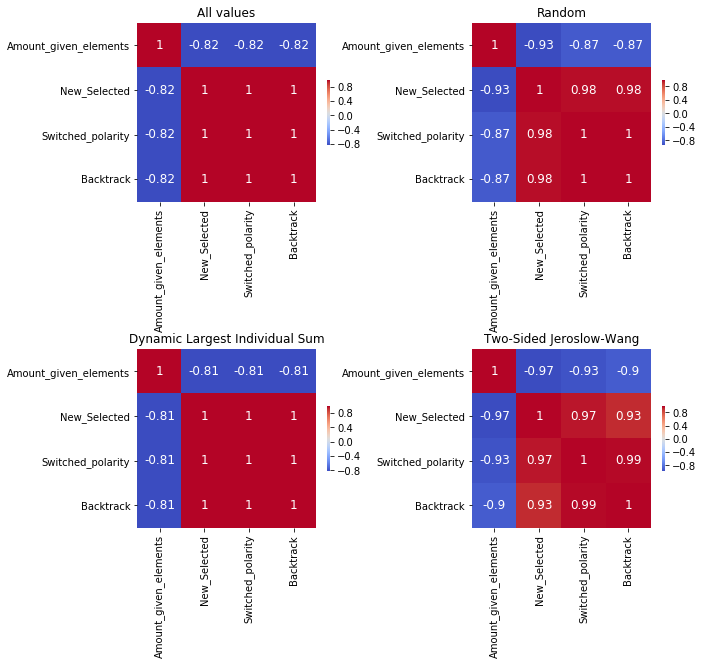

In [4]:
fig = plt.figure(figsize = (10,10)) # width x height
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
#plt.tight_layout()
# We use ax parameter to tell seaborn which subplot to use for this plot

sns.heatmap(data=all_val.corr(), ax=ax1, cmap = plt.get_cmap('coolwarm'), square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=random.corr(), ax=ax2, cmap = plt.get_cmap('coolwarm'), square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=dlis.corr(), ax=ax3, cmap = plt.get_cmap('coolwarm'), square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=tsjw.corr(), ax=ax4, cmap = plt.get_cmap('coolwarm'), square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})

ax1.set_title('All values')
ax2.set_title('Random')
ax3.set_title('Dynamic Largest Individual Sum')
ax4.set_title('Two-Sided Jeroslow-Wang')

In [5]:
df= pd.DataFrame()
a='Amount_given_elements'
n='New_Selected'
b='Backtrack'
dlis_p_n=ss.pearsonr(dlis[a], dlis[n])[1]
dlis_p_b=ss.pearsonr(dlis[a], dlis[b])[1]
random_p_n=ss.pearsonr(random[a], random[n])[1]
random_p_b=ss.pearsonr(random[a], random[b])[1]
all_p_n=ss.pearsonr(all_val[a], all_val[n])[1]
all_p_b=ss.pearsonr(all_val[a], all_val[b])[1]
tsjw_p_n=ss.pearsonr(tsjw[a], tsjw[n])[1]
tsjw_p_b=ss.pearsonr(tsjw[a], tsjw[b])[1]
data={'': ['All', 'Random', 'DLIS', '2-sided JW'], 'New_selected': [all_p_n, random_p_n, dlis_p_n, tsjw_p_n], 'Backtrack':[all_p_b, random_p_b, dlis_p_b, tsjw_p_b]}
df= pd.DataFrame(data)
df.set_index('').T

,All,Random,DLIS,2-sided JW
New_selected,0.089736,0.020321,0.093104,0.005507
Backtrack,0.092274,0.054015,0.095109,0.038639


In [6]:
ss.pearsonr(dlis['Amount_given_elements'], dlis['New_Selected'])

df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in all_val.columns:
    for y in all_val.columns:
        corr = ss.pearsonr(all_val[x], all_val[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

display(df_p)
display(df_corr)

,Amount_given_elements,New_Selected,Switched_polarity,Backtrack
Amount_given_elements,0.000000,8.973627e-02,9.224124e-02,9.227399e-02
New_Selected,0.089736,0.000000e+00,1.267145e-07,1.305502e-07
Switched_polarity,0.092241,1.267145e-07,0.000000e+00,3.932948e-13
Backtrack,0.092274,1.305502e-07,3.932948e-13,0.000000e+00


,Amount_given_elements,New_Selected,Switched_polarity,Backtrack
Amount_given_elements,1.000000,-0.819206,-0.815790,-0.815745
New_Selected,-0.819206,1.000000,0.999978,0.999977
Switched_polarity,-0.815790,0.999978,1.000000,1.000000
Backtrack,-0.815745,0.999977,1.000000,1.000000


In [ ]:
test=test.drop("Dynamic largest individual sum")
#test=test.drop([h])
test.plot.b()